# Banque de donnée du Laboratoire de recherche en mobilité et sport adapté

Le laboratoire possède une banque de données permettant de standardiser la sauvegarde des données brutes et faciliter leur traitement ultérieur. Cette banque de données est intégrée au serveur NextCloud (https://mosa.uqam.ca).

Dans ce tutoriel, nous utiliserons le projet `FC_BB18E`. Pour votre projet, utilisez le nom du dossier partagé sur NextCloud qui correspond au projet, en respectant majuscules et minuscules. Pour voir le contenu d'un projet sur NextCloud, allez dans l'onglet "Banque de données", entrez votre identifiant NextCloud et le nom du projet.

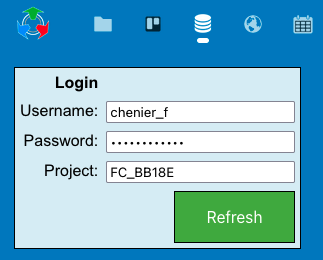

Cette interface est en lecture seule, elle permet de consulter quels fichiers existent, et elle offre des outils de tri et de filtre. Chaque ligne de la base de données correspond à un fichier.

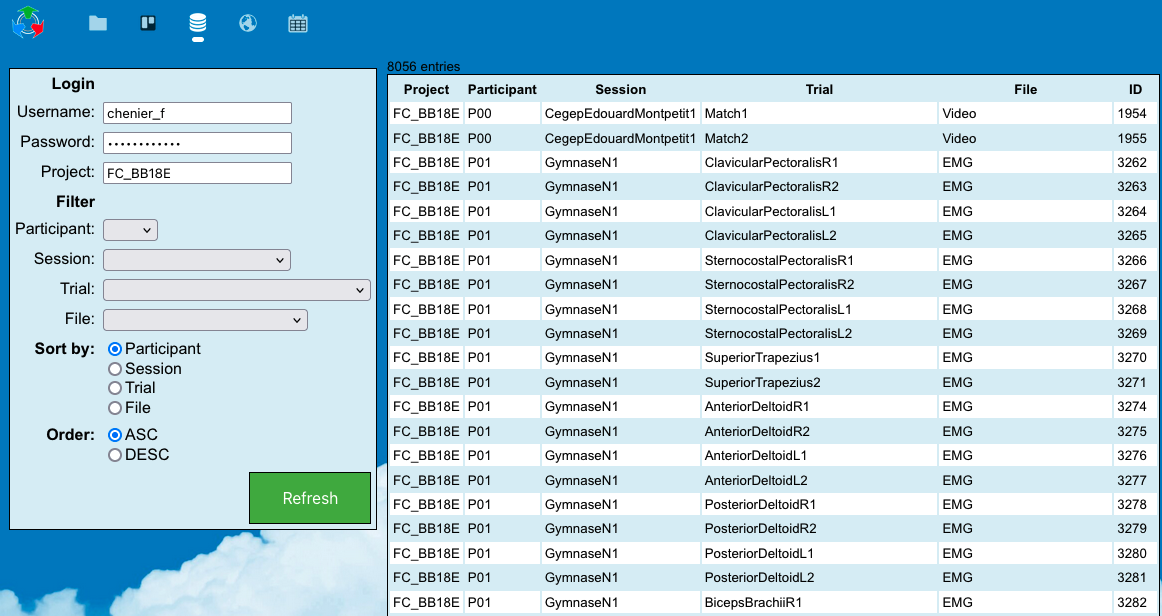


## Interface Python

Avant tout, il est intéressant d'installer l'application NextCloud Desktop Client https://nextcloud.com/install/#install-clients sur votre ordinateur. Cette application crée un dossier local toujours synchronisé avec NextCloud. Ainsi, vous pouvez travailler localement sur vos fichiers expérimentaux en même temps que ceux-ci soient mis à jour sur NextCloud.

Pour ajouter, modifier, supprimer des fichiers de la banque de données, on utilise le module python [dbinterface](dbinterface.py) distribué sur ce repository (simplement ajouter `dbinterface.py` dans votre dossier local). Pour créer un lien vers le projet `FC_BB18E`:


In [28]:
import dbinterface
import kineticstoolkit.lab as ktk  # Pour avoir un affichage simplifié des dictionnaires

project = dbinterface.DBInterface("FC_BB18E")

On vous demande alors d'entrer vos identifiants, puis de sélectionner le dossier local dans lequel se trouve les fichiers de données (le dossier de projet synchronisé avec NextCloud).

La correspondance entre les fichiers et leur entrées dans la banque de données est faite par identifiant de fichier. Cet identifiant doit se trouver dans le nom du fichier sous la forme `dbfidXXXXXn`. Par exemple, pour la figure ci-haut, le fichier vidéo du premier match a l'identifiant 1954. Il y a donc, dans le dossier de données, un fichier dont le nom comporte `dbfid1954n`.

Si, lors de la création de la variable de projet, vous observez ce message :

`UserWarning: Duplicate file(s) found. See duplicates property.`

alors veuillez consulter la section “Correction des fichiers doublons” plus bas pour régler ce problème avant de continuer.

### Consulter les informations du projet

En tapant simplement le nom de la variable, on peut avoir un aperçu du contenu du projet:

In [29]:
project

--------------------------------------------------
DBInterface
--------------------------------------------------
        url: https://mosa.uqam.ca/db/cgi-bin/api.py
       user: chenier_f
    project: FC_BB18E
root_folder: /Users/felix/mosa.uqam.ca/FC_BB18E/Data
--------------------------------------------------
participants:
['P00', 'P02', 'P01', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12']
--------------------------------------------------
sessions:
['CegepEdouardMontpetit1', 'GymnaseN1', 'GymnaseN2']
--------------------------------------------------
trials:
['Match1', 'Match2', 'ClavicularPectoralisR1', 'ClavicularPectoralisR2', 'ClavicularPectoralisL1', 'ClavicularPectoralisL2', 'SternocostalPectoralisR1', 'SternocostalPectoralisR2', 'SternocostalPectoralisL1', 'SternocostalPectoralisL2', 'SuperiorTrapezius1', 'SuperiorTrapezius2', 'AnteriorDeltoidR1', 'AnteriorDeltoidR2', 'AnteriorDeltoidL1', 'AnteriorDeltoidL2', 'PosteriorDeltoidR1', 'PosteriorDeltoidR2

Ces différents champs sont par exemple utilisés pour interroger le projet à l'aide de la méthode `get`.

In [39]:
# Obtenir les informations ci-haut dans un dictionnaire
project.get()

{
         'Project': 'FC_BB18E'
    'Participants': <list of 13 items>
        'Sessions': ['CegepEdouardMontpetit1', 'GymnaseN1', 'GymnaseN2']
          'Trials': <list of 121 items>
           'Files': <list of 20 items>
             'IDs': <list of 8056 items>
       'FileNames': <list of 6380 items>
}

In [40]:
# Quels sont les participants disponibles
project.get()["Participants"]

['P00',
 'P02',
 'P01',
 'P03',
 'P04',
 'P05',
 'P06',
 'P07',
 'P08',
 'P09',
 'P10',
 'P11',
 'P12']

In [41]:
# Quelles sont les sessions disponible pour P02
project.get(participant="P02")["Sessions"]

['GymnaseN1']

In [32]:
# Quels sont les essais (trials) pour la session GymnaseN1 de P02
project.get(participant="P02", session="GymnaseN1")["Trials"]

['ClavicularPectoralisR1',
 'ClavicularPectoralisR2',
 'ClavicularPectoralisL1',
 'ClavicularPectoralisL2',
 'SternocostalPectoralisR1',
 'SternocostalPectoralisR2',
 'SternocostalPectoralisL1',
 'SternocostalPectoralisL2',
 'SuperiorTrapezius1',
 'SuperiorTrapezius2',
 'AnteriorDeltoidR1',
 'AnteriorDeltoidR2',
 'AnteriorDeltoidL1',
 'AnteriorDeltoidL2',
 'PosteriorDeltoidR1',
 'PosteriorDeltoidR2',
 'PosteriorDeltoidL1',
 'PosteriorDeltoidL2',
 'BicepsBrachiiR1',
 'BicepsBrachiiR2',
 'BicepsBrachiiL1',
 'BicepsBrachiiL2',
 'TricepsBrachiiR1',
 'TricepsBrachiiR2',
 'TricepsBrachiiL1',
 'TricepsBrachiiL2',
 'ErectorSpinaeR1',
 'ErectorSpinaeR2',
 'ProbingRearWheelContactL1',
 'ProbingRearWheelCenterL1',
 'ProbingRearWheelTopL1',
 'ProbingBackwardRearAntitipCenterL1',
 'ProbingForwardRearAntitipCenterL1',
 'ProbingBackwardFrontAntitipCenterL1',
 'ProbingForwardFrontAntitipCenterL1',
 'ProbingRearSeatL1',
 'ProbingBackrestHeightL1',
 'ProbingRearWheelContactR1',
 'ProbingRearWheelCenterR

In [42]:
# Quels sont les types de fichier disponibles pour l'essai SprintSyncR1
project.get(participant="P02", session="GymnaseN1", trial="SprintSyncR1")["Files"]

['Video',
 'Kinematics',
 'SWL',
 'SWR',
 'EMG',
 'LabelledMarkers',
 'ProcessedKinematics',
 'SyncSWR',
 'SyncSWL',
 'SyncMarkers',
 'SyncedMarkers',
 'SyncedSWL',
 'SyncedSWR',
 'SyncedEMG',
 'ReconstructedKinematicsPy',
 'InverseDynamics',
 'ProcessedEMG']

In [43]:
# Où se trouve le fichier LabelledMarkers pour l'essai SprintSyncR1
project.get(
    participant="P02", session="GymnaseN1", trial="SprintSyncR1", file="LabelledMarkers"
)["FileNames"]

['/Users/felix/mosa.uqam.ca/FC_BB18E/Data/P02/Optitrack/LabelledMarkers/Take_076_dbfid7557n_{SprintSyncR1}.c3d']

Il devient maintenant clair comment on peut utiliser cette interface pour réaliser des traitements systématiques (batch-processing) des fichiers de la banque de données.

### Ajouter un fichier à la banque de données

Après une collecte, on se retrouve avec plusieurs fichiers de données qu’on veut associer à la banque de données (en ajoutant les dbfid correspondants dans leurs noms).

- Étape 1: déposer ces fichiers dans votre dossier de projet synchronisé avec NextCloud.
- Étape 2: lancer, pour chaque fichier, la méthode suivante :

```python
project.assign_file_id(participant, session, trial, file)
```

Par exemple, supposons qu’on a un fichier nommé `data.csv`, et qu’on veut le catalogger dans la banque de données comme étant un fichier :

- de données de la roue instrumentée SmartWheel gauche (SWL)
- lors de la deuxième répétition d’un sprint synchrone (SprintSyncL2)
- enregistrée au Gymnase N lors de la première visite (GymnaseN1)
- du participant P01.

Cette commande :

```python
project.assign_file_id('P01', 'GymnaseN1', 'SprintSyncL1', 'SWL')
```

lance une boîte de dialogue qui nous demande de sélectionner ce fichier (`data.csv`). 

Si nécessaire, un nouvel identifiant de fichier sera créé dans la banque de données, et le fichier est renommé pour correspondre à cette entrée :

```
data_dbfid12345n_{SprintSyncL1}.csv
```

Pour un projet donné, il convient de créer un script qui appellera project.assign_file_id() plusieurs fois. À titre d’exemple minimal :

```python
participant = 'P01'
trials = [
    'SprintSyncL1',
    'SprintSyncL2',
    'SprintSyncR1',
    'SprintSyncR2',
]

for trial in trials:
    project.assign_file_id(participant, 'GymnaseN1', trial, 'SWL')
    project.assign_file_id(participant, 'GymnaseN1', trial, 'SWR')

```

On répètera ainsi ce script chaque fois qu’on a un nouveau participant.

### Correction des fichiers doublons

Lors de la création d’une variable de projet, il est possible qu’on reçoive ce message d’avertissement :

```
UserWarning: Duplicate file(s) found. See duplicates property.
```

Si c’est le cas, c’est que deux fichiers portent le même dbfid dans le dossier sélectionné. C’est une situation qui peut être due à plusieurs causes, dont des problèmes de synchronisation ou de partage de fichiers. Cette erreur doit être corrigée avant de poursuivre, puisqu’elle crée une ambigüité sur les fichiers de données qu’on traite.
On peut savoir quels sont ces fichiers en tapant:

```python
project.duplicates
```

```
[('/Users/felix/Dropbox/FC_BB18E/P06/Optitrack/ProcessedKinematics/Take_069_dbfid10756n_{SlalomL1} (conflicted file).tak',
  '/Users/felix/Dropbox/FC_BB18E/P06/Optitrack/ProcessedKinematics/Take_069_dbfid10756n_{SlalomL1}.tak')]
```

Dans ce cas, une erreur de synchronisation a dupliqué un fichier; il faut alors s’assurer de quel fichier est le bon, et supprimer l’autre. Après avoir modifié les fichiers, on peut faire:

```python
project.refresh()
```

qui met tout à jour (re-téléchargement des informations de la banque de données, re-lien avec les fichiers locaux).

```python
project.duplicates
```

```
[]
```


### Sauvegarder et charger des données traitées

La banque de données ne catalogue pas seulement les fichiers de données brutes, mais également les données traitées. La classe DBInterface permet de charger et sauvegarder directement des fichiers `.ktk.zip` tout en créant les associations dans la banque de données.

Pour sauver un fichier à l'aide de `ktk.save()` et automatiquement l'ajouter à la banque de données:

```python
project.save(
    participant="P02",
    session="GymnaseN1",
    trial="SprintSyncL1",
    file="SyncSWL",
    variable
)
```

Cette commande crée si nécessaire une entrée de fichier (dbfid) sur la banque de données, puis sauvegarde la variable dans un fichier `ktk.zip`. Le nom de ce fichier est déterminé automatiquement et le fichier est sauvegardé dans le dossier du projet. Il est ainsi automatiquement listé dans la banque de donnée, et disponible avec les autres fichiers sur NextCloud.

Pour le charger de nouveau :

```python
variable = project.load(
    participant="P02",
    session="GymnaseN1",
    trial="SprintSyncL1",
    file="SyncSWL"
)
```

### Pour les experts: consultation des données à l’aide de Pandas

En toute temps, le projet conserve une copie à jour de la table Files de la banque de données. Cette table est stockée sous la forme d’un Pandas DataFrame:

```python
project.table
```

```
        Project  ...                                           FileName
ID               ...                                                   
1954   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/Videos matches/I...
1955   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/Videos matches/I...
2845   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/EMG_All_Particip...
2846   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/EMG_All_Particip...
2847   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/EMG_All_Particip...
        ...  ...                                                ...
8419   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/P12/Optitrack/Pr...
8420   FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/P12/Optitrack/La...
10068  FC_BB18E  ...                                                   
12748  FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/ReconstructedKin...
11866  FC_BB18E  ...  /Users/felix/Dropbox/FC_BB18E/EMGMax/P12.Gymna...

[7968 rows x 7 columns]
```

Ceux qui sont habiles avec Pandas peuvent donc utiliser les fonctions propres aux DataFrames pour interroger la banque de données. Cette table est mise à jour lors d'un appel à `project.refresh()`.


### Réassignation d’un dossier à un autre type de fichier

Attention : doit se faire dans un bon état d’éveil !

Cette procédure vise les moments où on traite des données à l’extérieur de Python. Disons qu’un projet comporte ces deux types de fichier de capture du mouvement:

- "TAK": Fichier tak de Motive.
- "C3D": Fichier c3d exporté de Motive après le labelling.

Cet exemple est une séquence d’opérations typique dans ce type de projet:

1. Enregistrement du mouvement avec le participant, à l’aide de Motive

Chaque essai est enregistré sous une forme `TrialXXX.tak`. Nous stockons ces fichiers, par exemple, dans le dossier `FC_ABC22/P01/Optitrack`, ce qui nous donne par exemple cet ensemble de fichiers:

- FC_ABC22/P01/Optitrack/Trial001.tak
- FC_ABC22/P01/Optitrack/Trial002.tak

2. Association des fichiers à la banque de données

À l’aide de la méthode `assign_file_id()` décrite plus haut, on associe chaque fichier "TAK" à la banque de données.

Par exemple :

```python
project.assign_file_id('P01', 'Session1', 'AnatomicPosition', 'TAK')
project.assign_file_id('P01', 'Session1', 'Sprint', 'TAK')
```

ce qui renomme les fichiers sous cette forme :

- FC_ABC22/P01/Optitrack/Trial001_dbfid12345_{AnatomicPosition}.tak
- FC_ABC22/P01/Optitrack/Trial002_dbfid12346_{Sprint}.tak
    
3. Labelling des marqueurs

La prochaine étape est normalement de labeller les fichiers .tak dans Motive.

4. Exporter des fichiers C3D

Dans Motive, on sélectionne tous les fichiers labellés :

- FC_ABC22/P01/Optitrack/Trial001_dbfid12345_{AnatomicPosition}.tak
- FC_ABC22/P01/Optitrack/Trial002_dbfid12346_{Sprint}.tak

puis on les exporte sous une forme C3D dans un nouveau dossier. Disons qu’on appelle ce dossier C3D:

- FC_ABC22/P01/C3D/Trial001_dbfid12345_{AnatomicPosition}.c3d
- FC_ABC22/P01/C3D/Trial002_dbfid12346_{Sprint}.c3d

C’est ici que ça se corse. Lorsque Motive exporte les fichiers C3D, il conserve les mêmes noms de fichier que les fichier TAK (incluant le dbfid), ce qui est logique. Toutefois, il existe maintenant deux fois les mêmes dbfid dans le dossier de projet:

- dbfid12345n:
    - FC_ABC22/P01/Optitrack/Trial001_dbfid12345_{AnatomicPosition}.tak
    - FC_ABC22/P01/C3D/Trial001_dbfid12345_{AnatomicPosition}.c3d
- dbfid12346n:
    - FC_ABC22/P01/Optitrack/Trial002_dbfid12346_{Sprint}.tak
    - FC_ABC22/P01/C3D/Trial002_dbfid12346_{Sprint}.c3d

On se retrouve donc avec des doublons. Il faut donc créer de nouvelles entrées dans la banque de données pour les fichiers du dossier C3D. La procédure est sommes toutes assez simple, grâce à cette méthode :

```python
project.reassign_file_id_by_folder(file_label)
```

Par exemple :

```python
project.reassign_file_id_by_folder("C3D")
```

lance une boîte demandant de sélectionner le dossier pour lequel on veut créer de nouvelles entrées. Après avoir sélectionné le dossier FC_ABC22/P01/C3D, cette méthode crée une nouvelle entrée pour chaque fichier, puis renomme le fichier pour qu’il corresponde à cette nouvelle entrée :

- FC_ABC22/P01/C3D/Trial001_dbfid12347_{AnatomicPosition}.c3d
- FC_ABC22/P01/C3D/Trial002_dbfid12348_{Sprint}.c3d

À ce moment, project.refresh() ne devrait plus avertir à propos de doublons.

